In [1]:
pip install seaborn==0.12.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/var/folders/03/wlvqjvcn5pd14pk01y54r83r0000gn/T/ipykernel_71683/4083208389.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
df_train = pd.read_csv("../titanic/train.csv")
df_test = pd.read_csv("../titanic/test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
for col in df_train.columns:
    msg = 'column : {:>11}\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :    Survived	 Percent of NaN value : 0.00%
column :      Pclass	 Percent of NaN value : 0.00%
column :        Name	 Percent of NaN value : 0.00%
column :         Sex	 Percent of NaN value : 0.00%
column :         Age	 Percent of NaN value : 19.87%
column :       SibSp	 Percent of NaN value : 0.00%
column :       Parch	 Percent of NaN value : 0.00%
column :      Ticket	 Percent of NaN value : 0.00%
column :        Fare	 Percent of NaN value : 0.00%
column :       Cabin	 Percent of NaN value : 77.10%
column :    Embarked	 Percent of NaN value : 0.22%


In [8]:
for col in df_train.columns:
    print(df_train[col].isnull().sum())

0
0
0
0
0
177
0
0
0
0
687
2


In [9]:
for col in df_train.columns:
    print(df_train[col].shape)

(891,)
(891,)
(891,)
(891,)
(891,)
(891,)
(891,)
(891,)
(891,)
(891,)
(891,)
(891,)


In [10]:
type(df_train['Survived'].shape)

tuple

In [11]:
for col in df_test.columns:
    msg = 'column : {:>11}\t Percent of NaN value : {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test.shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :      Pclass	 Percent of NaN value : 0.00%
column :        Name	 Percent of NaN value : 0.00%
column :         Sex	 Percent of NaN value : 0.00%
column :         Age	 Percent of NaN value : 20.57%
column :       SibSp	 Percent of NaN value : 0.00%
column :       Parch	 Percent of NaN value : 0.00%
column :      Ticket	 Percent of NaN value : 0.00%
column :        Fare	 Percent of NaN value : 0.24%
column :       Cabin	 Percent of NaN value : 78.23%
column :    Embarked	 Percent of NaN value : 0.00%


<AxesSubplot: >

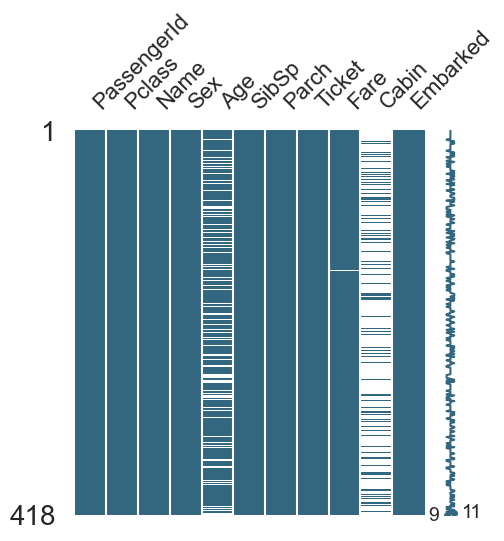

In [12]:
msno.matrix(df=df_test.iloc[:,:], figsize=(5,5), color=(0.2, 0.4, 0.5))

<AxesSubplot: >

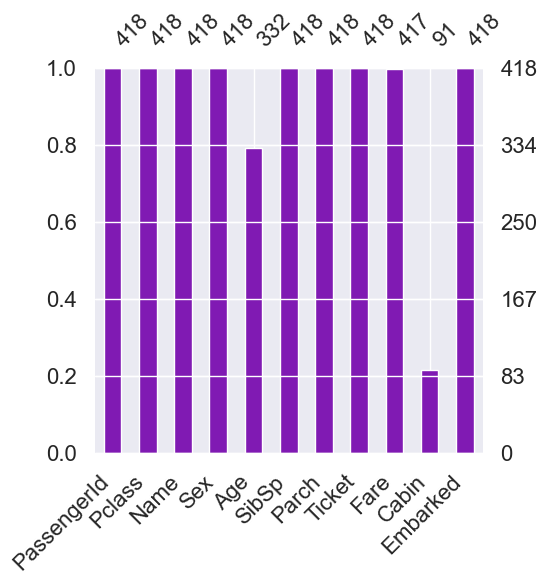

In [13]:
msno.bar(df=df_test.iloc[:,:], figsize=(5,5), color=(0.5,0.1,0.7))

<AxesSubplot: >

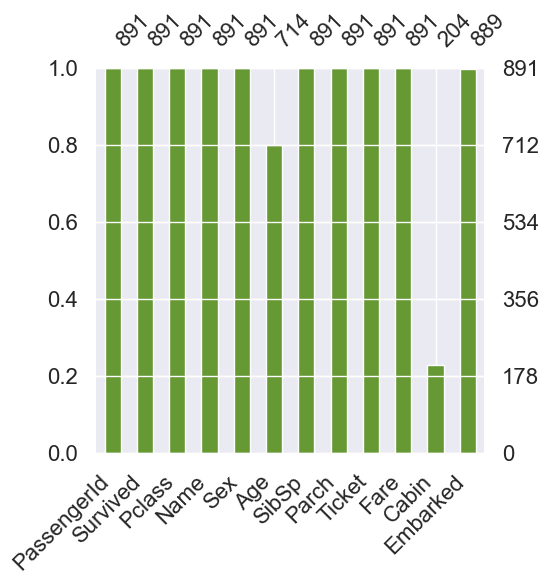

In [14]:
msno.bar(df=df_train.iloc[:, :], figsize=(5,5), color=(0.4, 0.6, 0.2))

In [15]:
df_train.loc[2]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                              26.0
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df_train.loc[2, 'Name']

'Heikkinen, Miss. Laina'

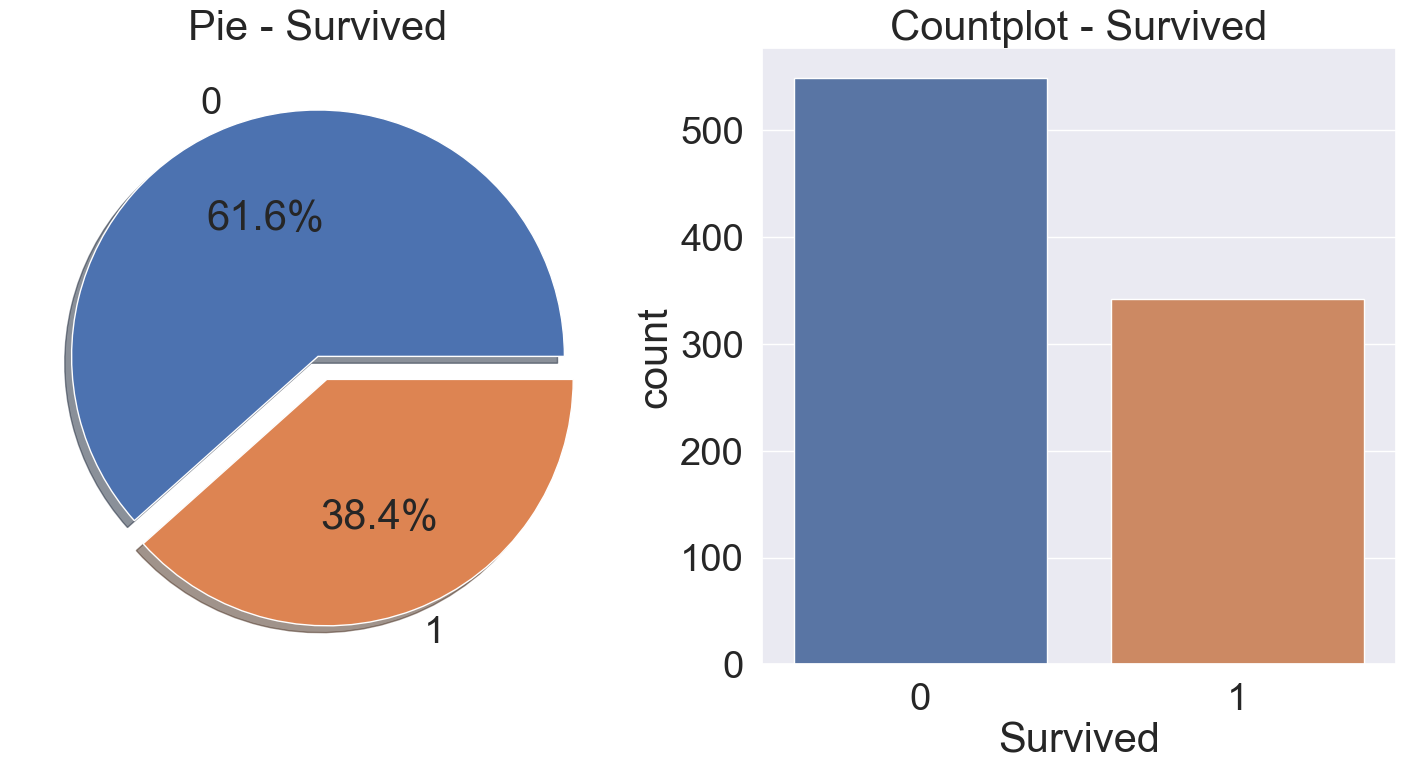

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie - Survived')
ax[0].set_ylabel('')
sns.countplot(data=df_train, x='Survived', ax=ax[1])
ax[1].set_title('Countplot - Survived')

plt.show()

In [19]:
df_train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [20]:
df_train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [21]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [22]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [24]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot: xlabel='Pclass'>

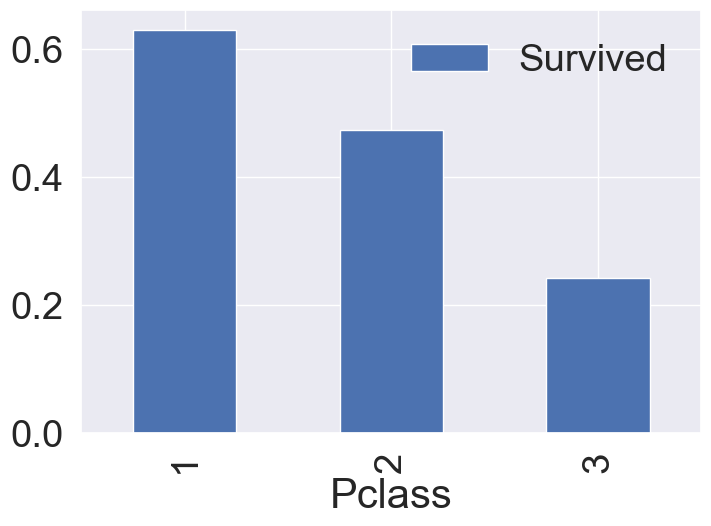

In [25]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index=True).mean().sort_values('Survived', ascending=False).plot.bar()

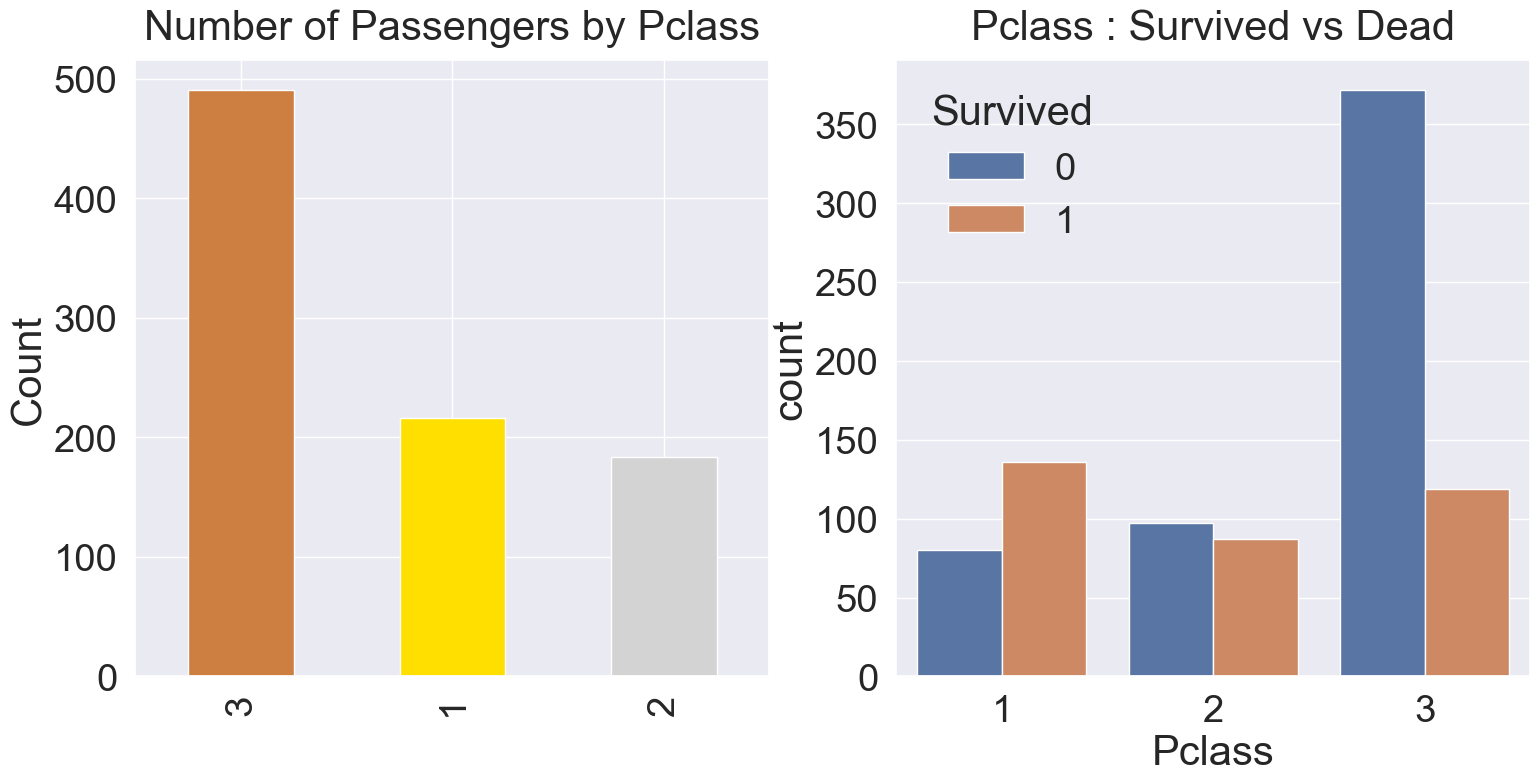

In [26]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F42','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

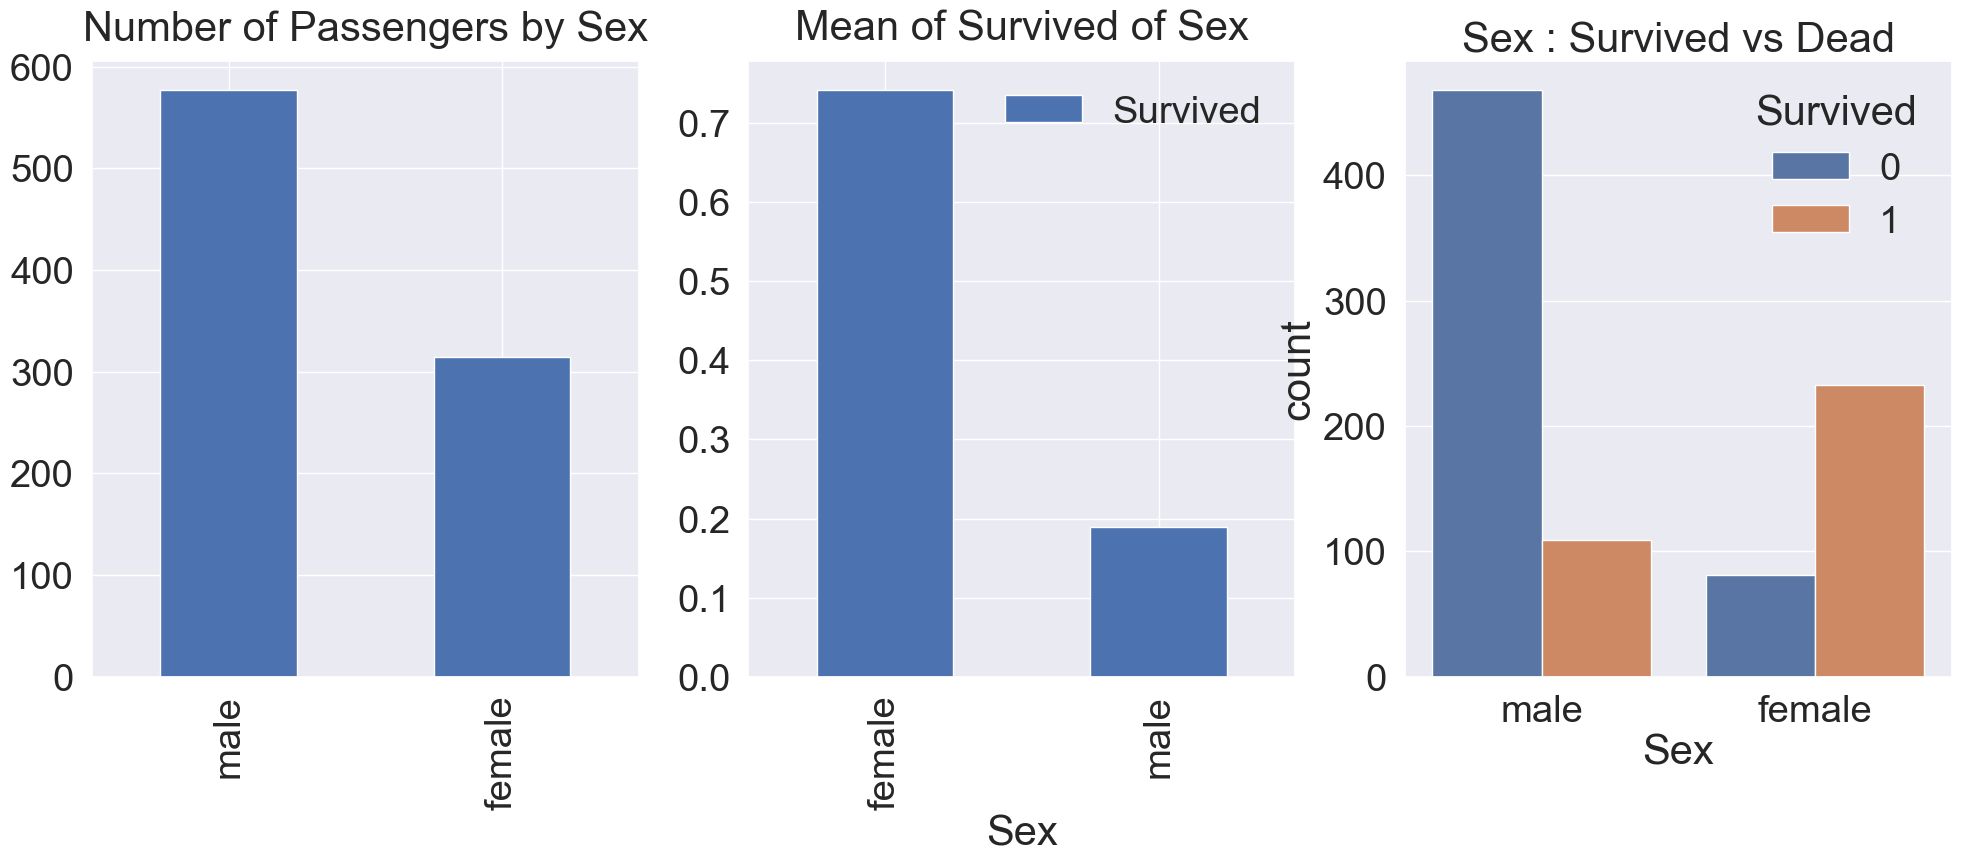

In [27]:
y_pos = 1.02

f, ax = plt.subplots(1, 3 ,figsize=(24,8))
df_train['Sex'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers by Sex', y=y_pos)
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[1])
ax[1].set_title('Mean of Survived of Sex', y=y_pos)
sns.countplot(data=df_train, x='Sex', hue='Survived', ax=ax[2])
ax[2].set_title('Sex : Survived vs Dead')
plt.show()

In [28]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values('Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [29]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [30]:
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values('Survived', ascending=True)

,Survived
Sex,
male,0.188908
female,0.742038


In [31]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


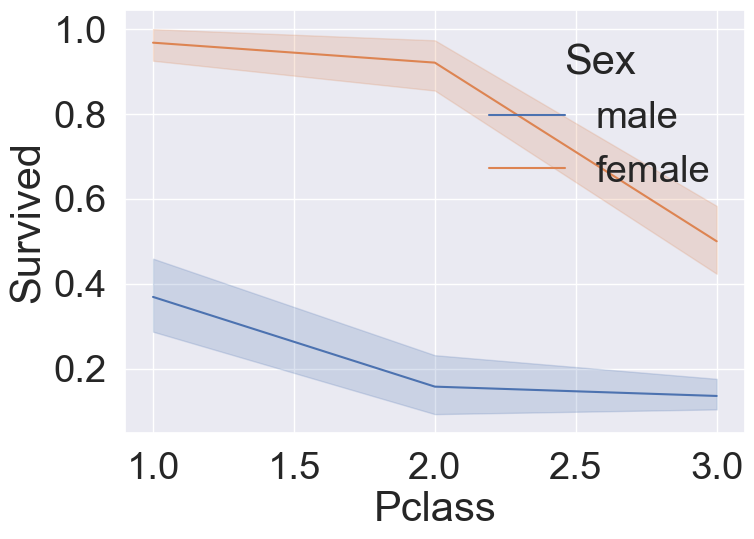

In [32]:
sns.lineplot(data=df_train, x='Pclass', y='Survived', hue='Sex')
plt.show()

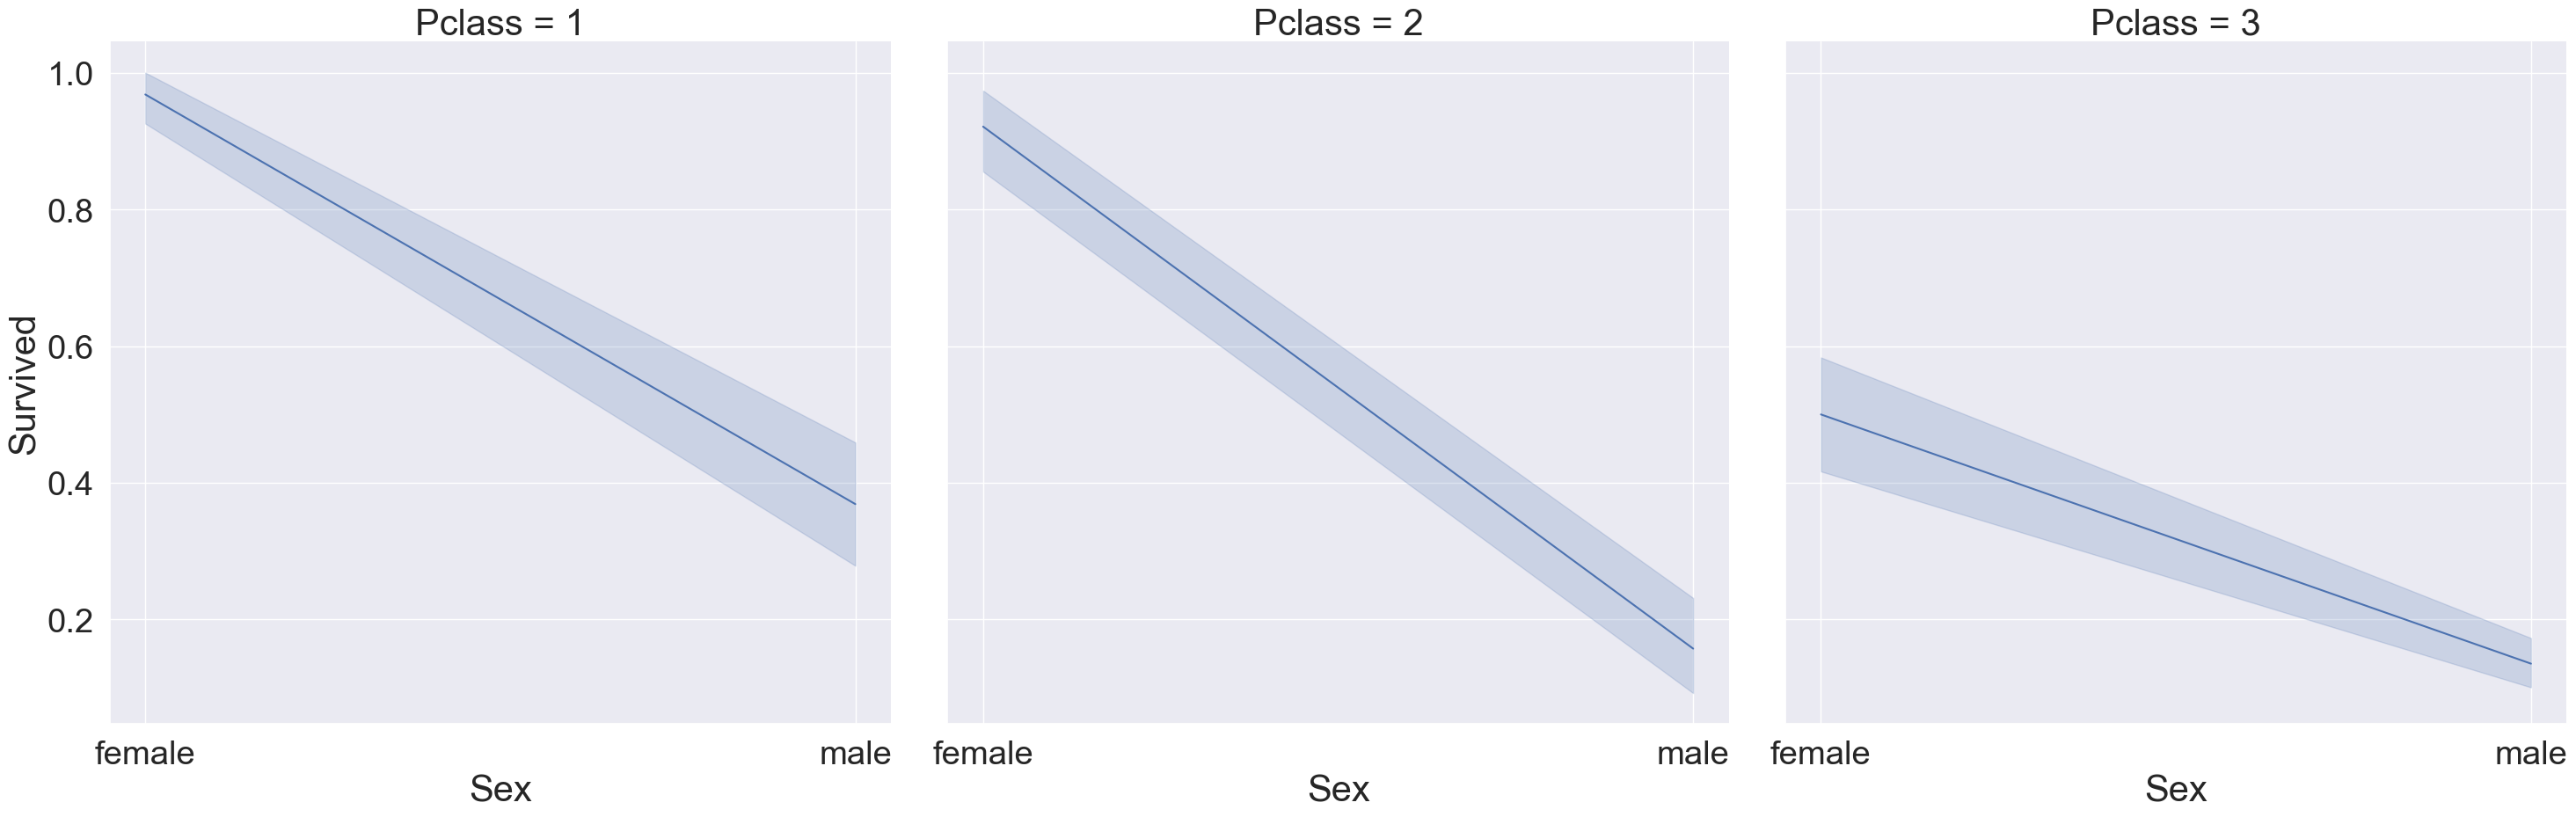

In [33]:
facet = sns.FacetGrid(df_train, col='Pclass', height= 10)
facet = facet.map(sns.lineplot, 'Sex', 'Survived')

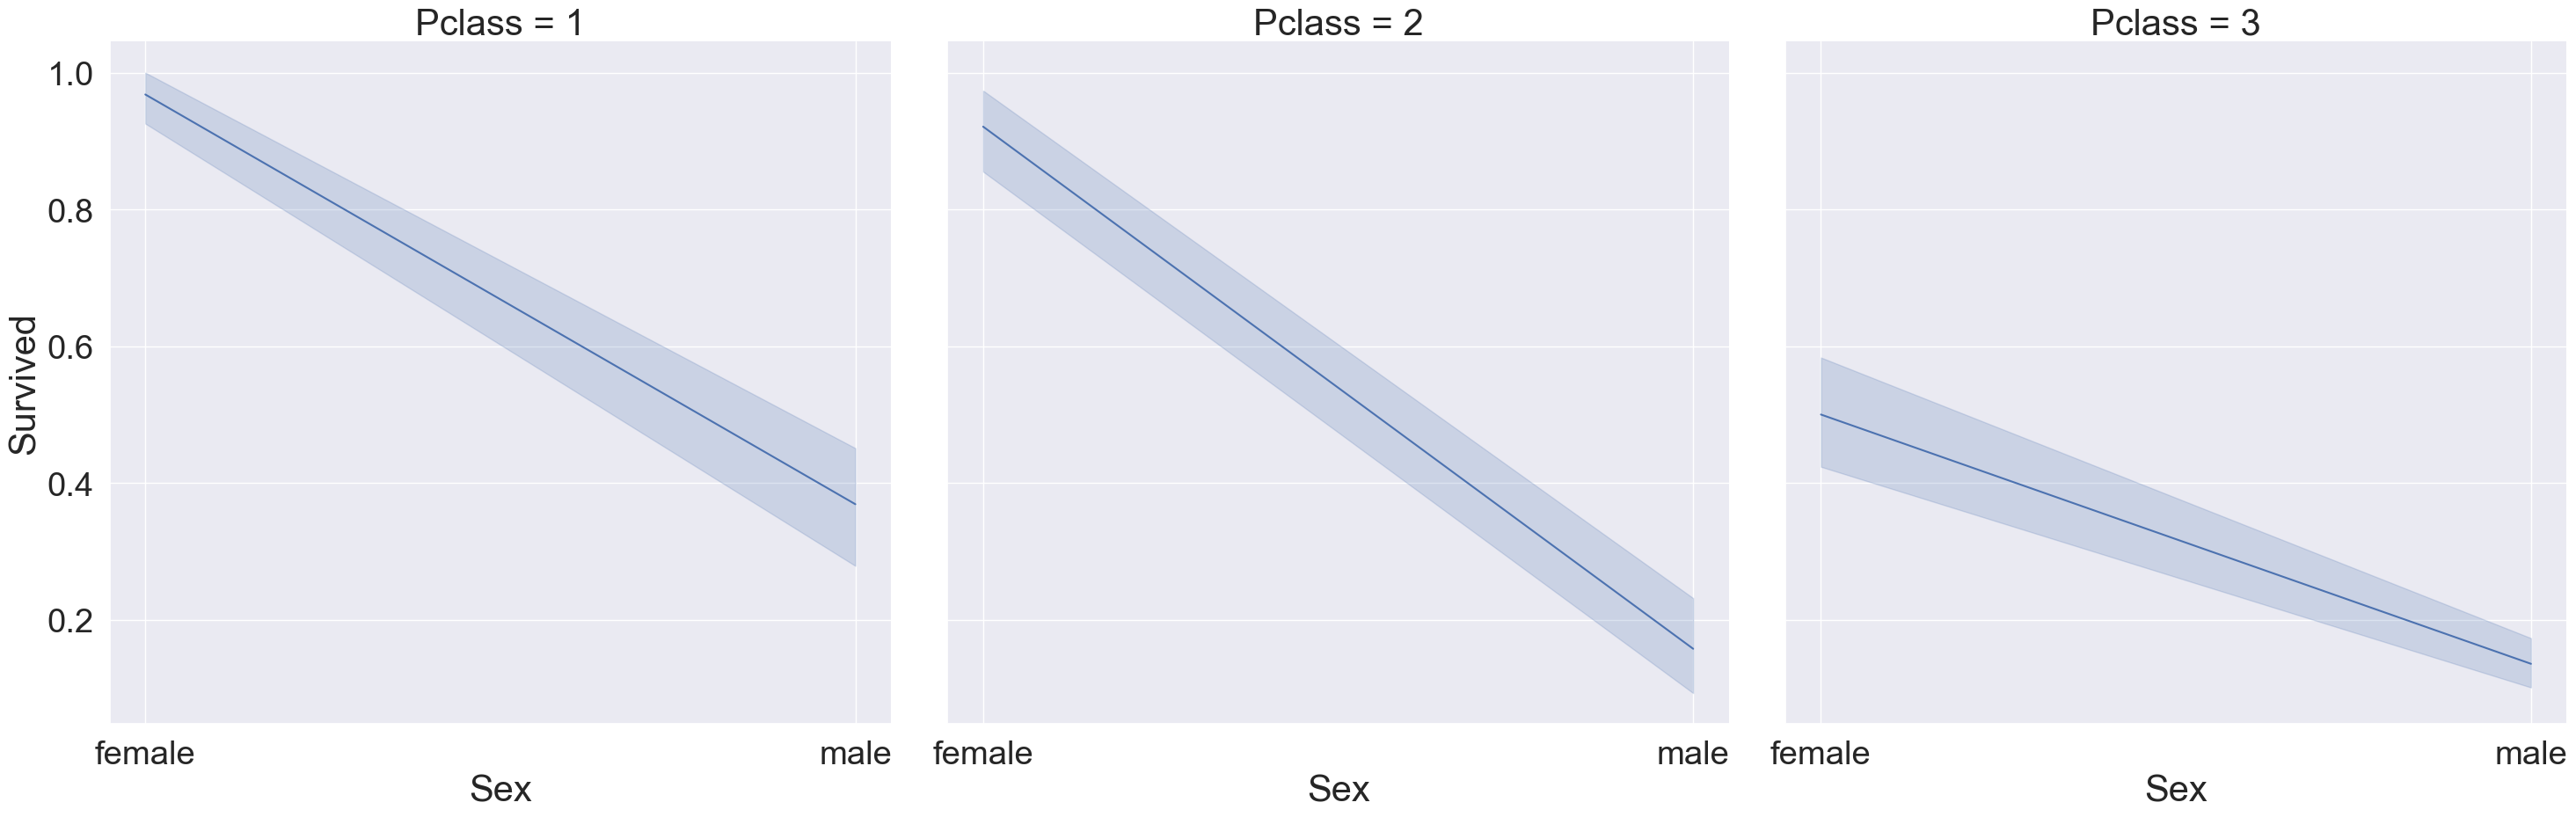

In [34]:
facet = sns.FacetGrid(df_train, col='Pclass', height=10)
facet = facet.map(sns.lineplot, 'Sex', 'Survived')

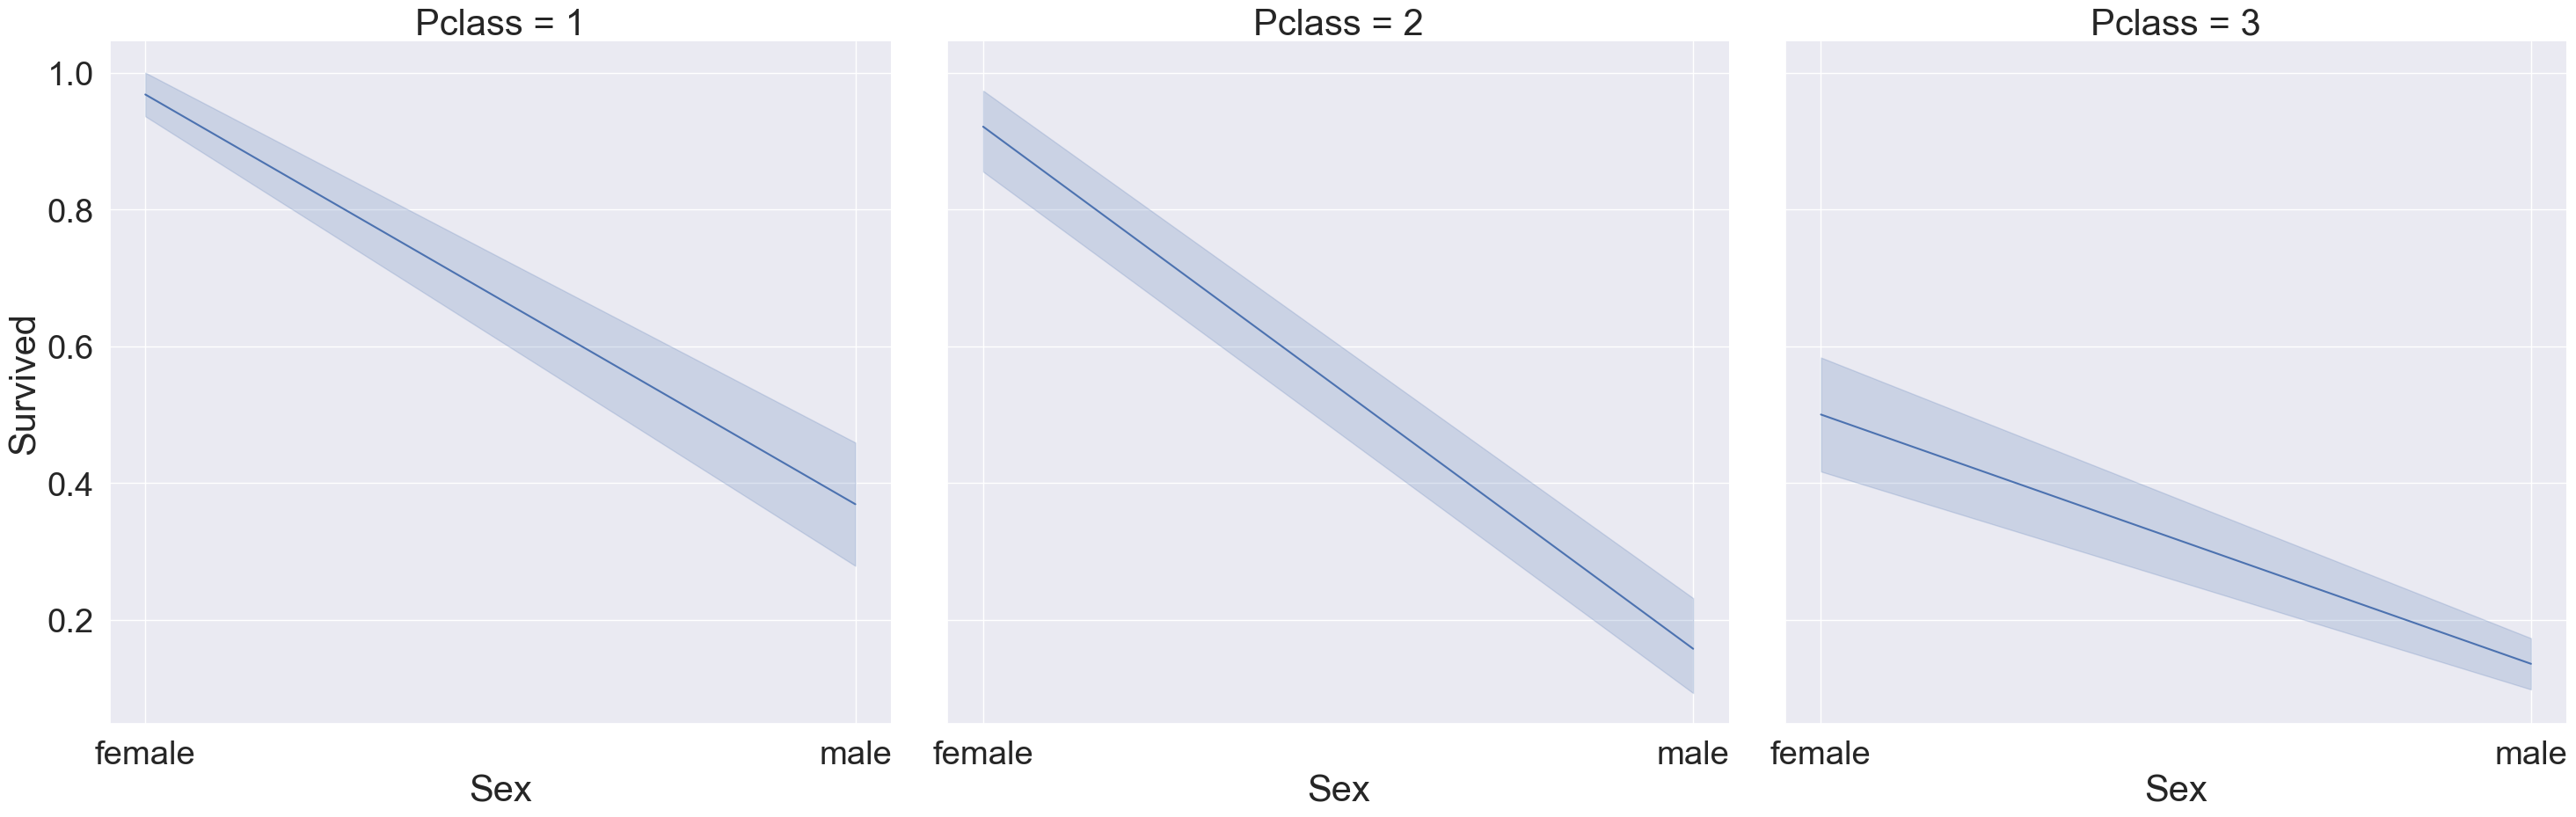

In [35]:
facet = sns.FacetGrid(df_train, col='Pclass', height=10)
facet = facet.map(sns.lineplot, 'Sex', 'Survived')

In [36]:
print('제일 나이가 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


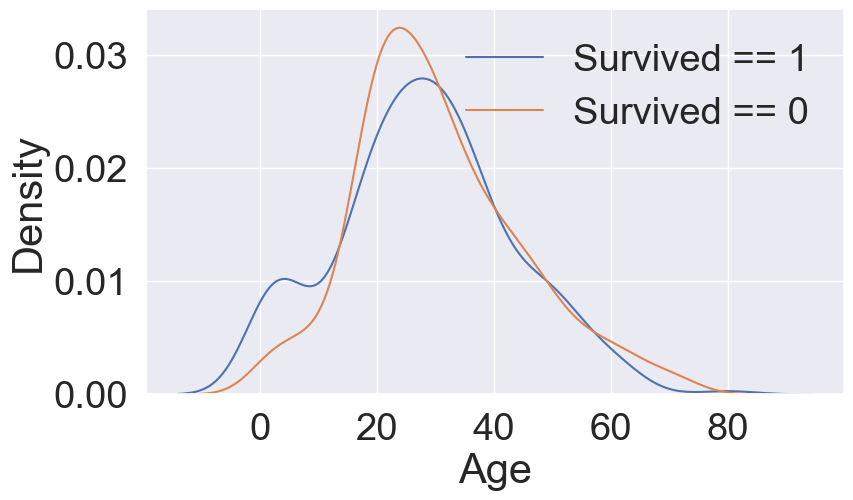

In [37]:
f, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

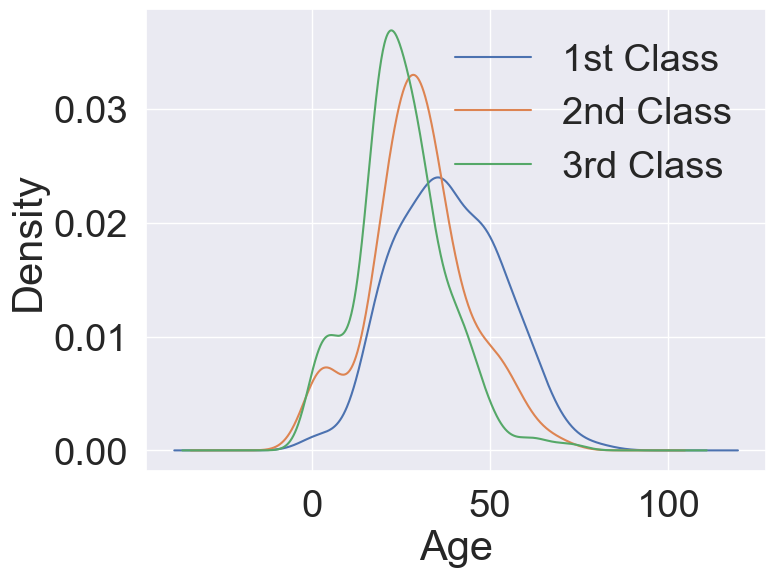

In [38]:
plt.figure(figsize=(8, 6))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

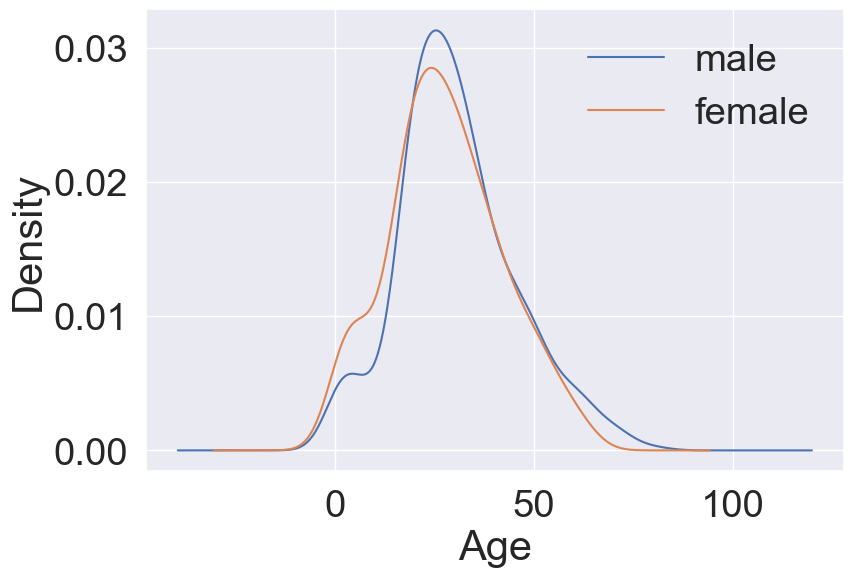

In [39]:
plt.figure(figsize=(9, 6))

df_train['Age'][df_train['Sex']=='male'].plot(kind='kde')
df_train['Age'][df_train['Sex']=='female'].plot(kind='kde')

plt.xlabel('Age')
plt.legend(['male', 'female'])
plt.show()

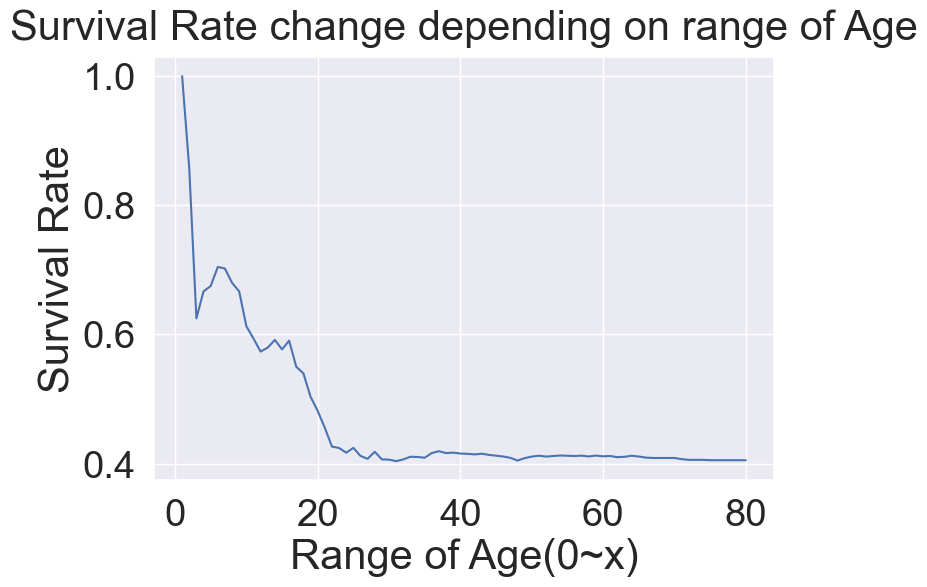

In [40]:
cummulate_survival_ratio = []

for i in range (0,81):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.plot(cummulate_survival_ratio)
plt.title('Survival Rate change depending on range of Age', y=1.02)
plt.xlabel('Range of Age(0~x)')
plt.ylabel('Survival Rate')
plt.show()

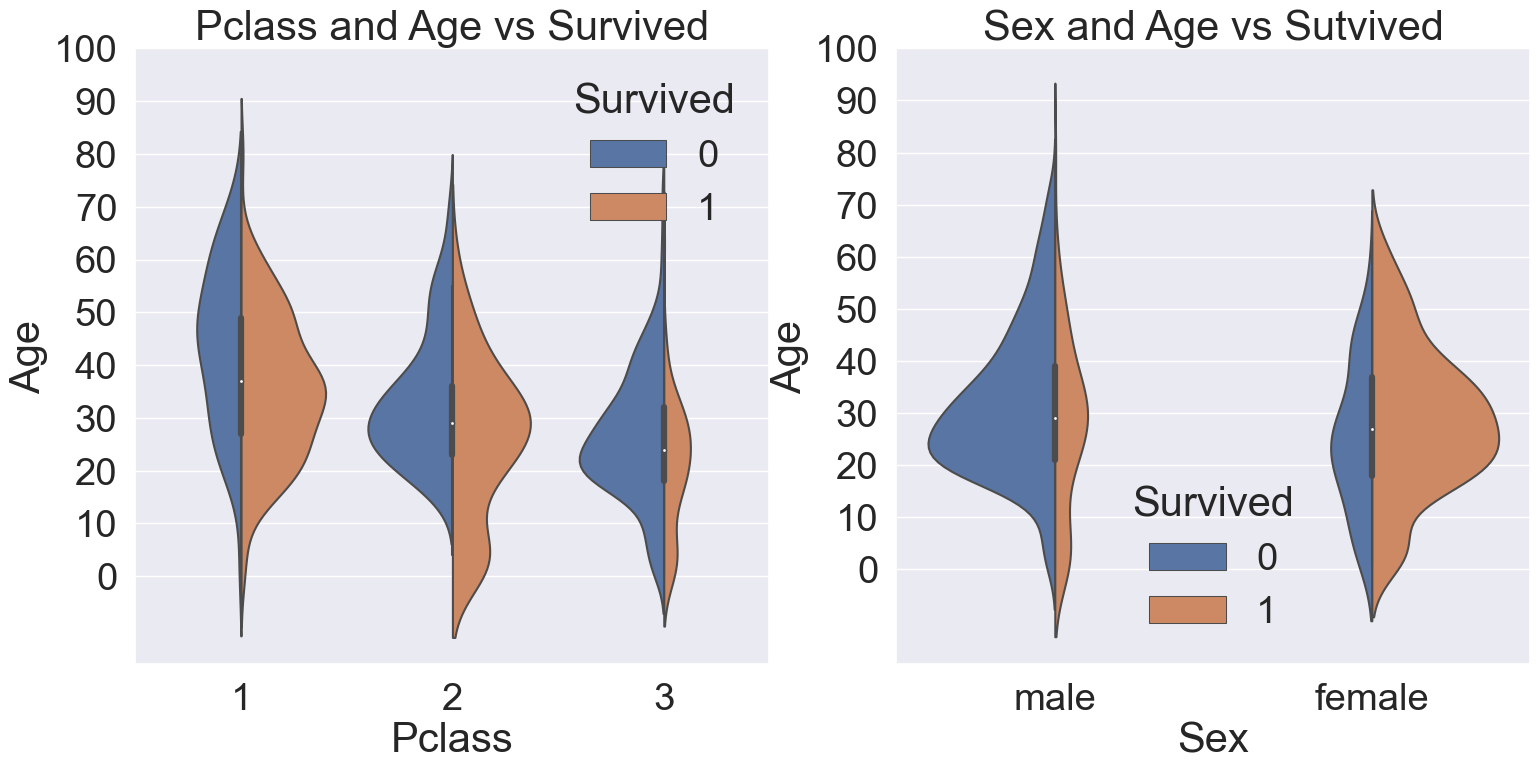

In [41]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(data=df_train, x='Sex', y='Age', hue='Survived', scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Sutvived')
ax[1].set_yticks(range(0,110,10))
plt.show()


<AxesSubplot: xlabel='Embarked'>

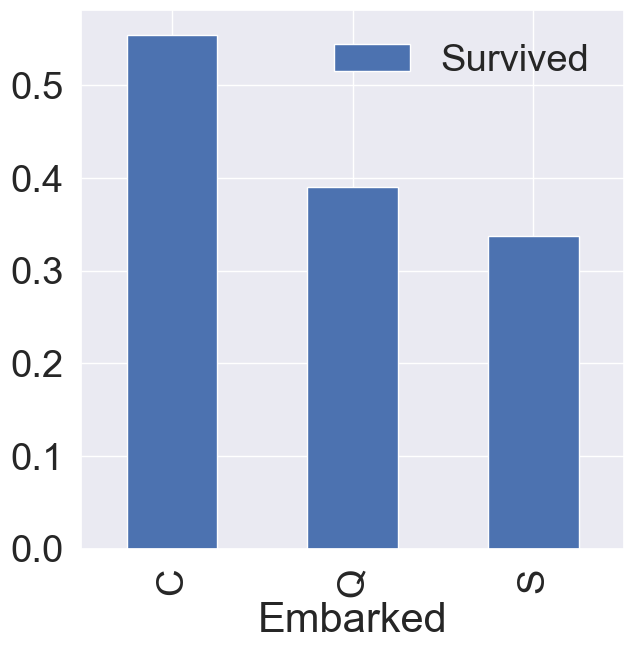

In [42]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

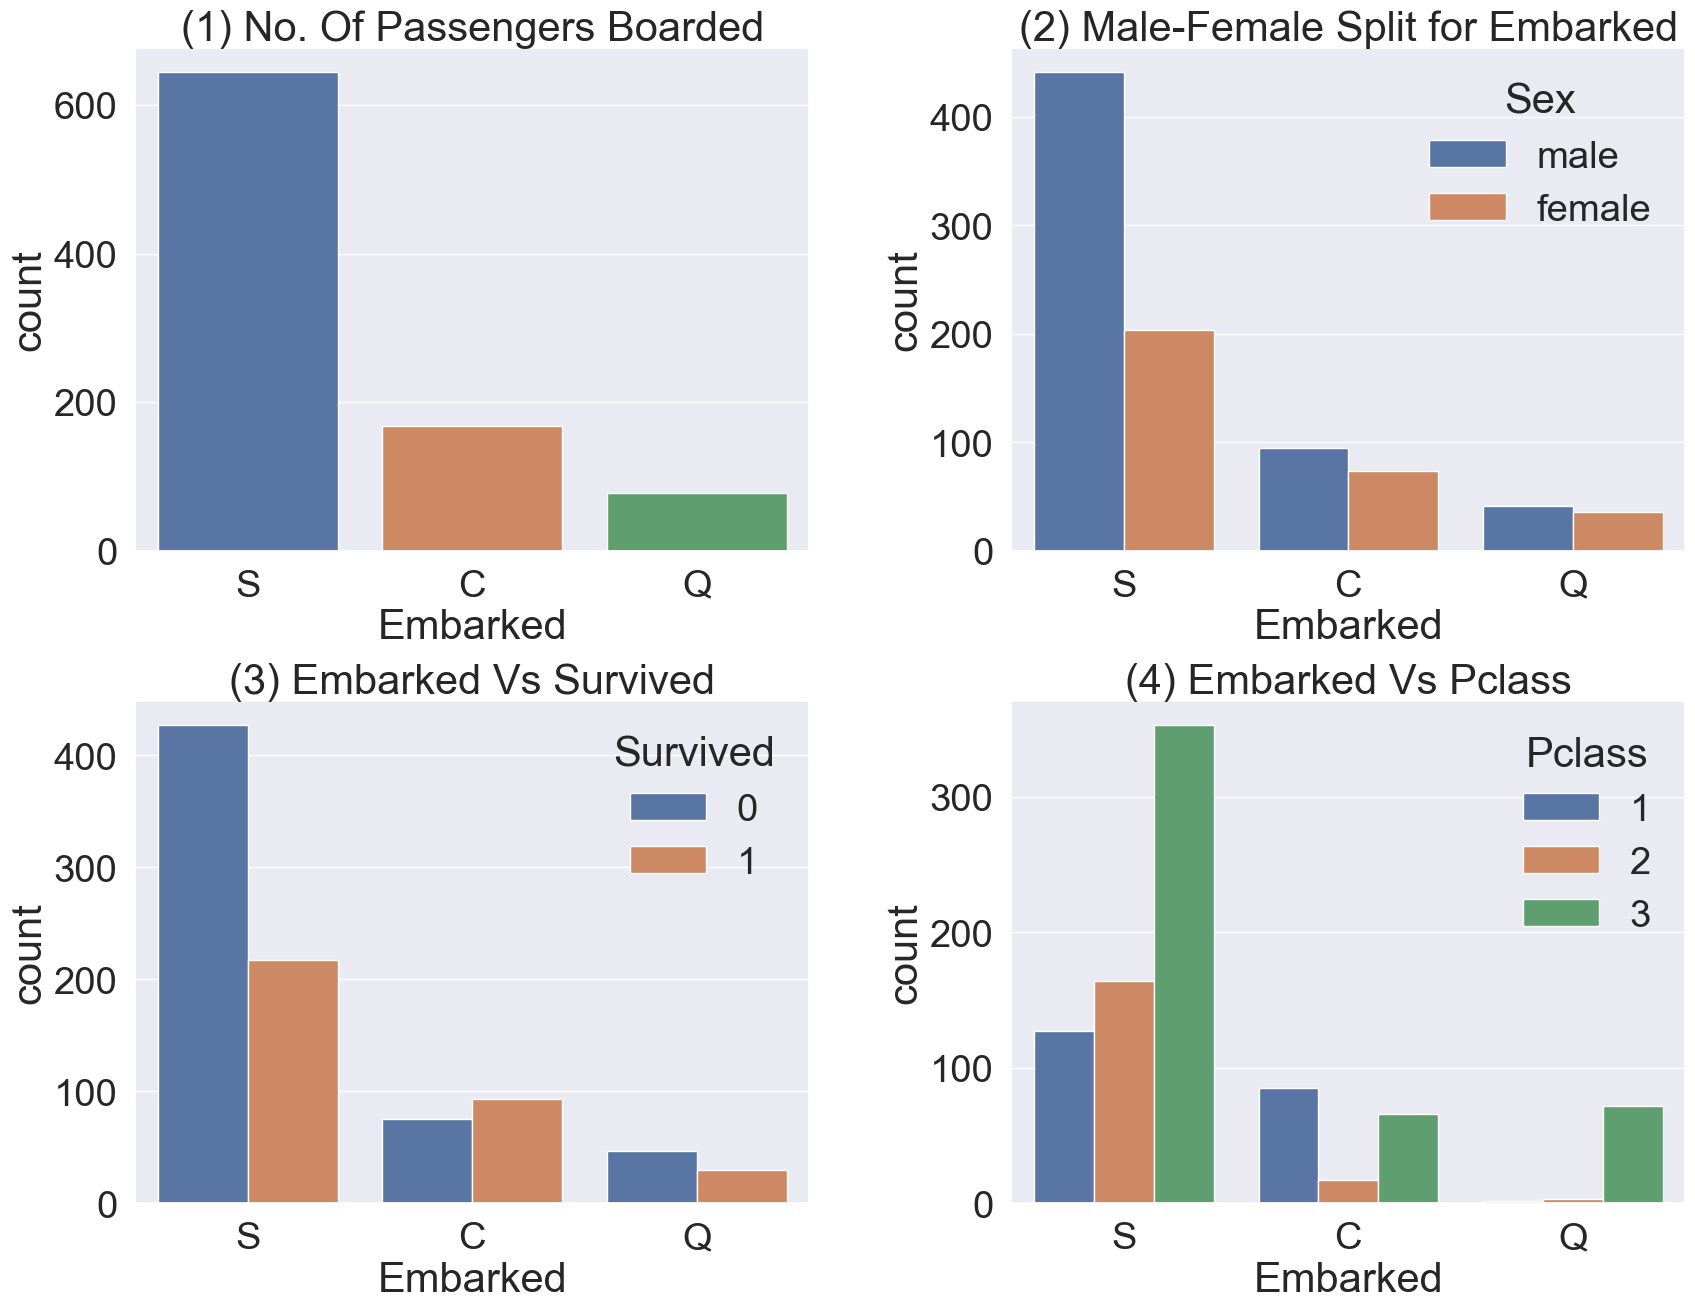

In [43]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
#탑승객 명수를 Countplot으로 그래프화
sns.countplot(data=df_train, x='Embarked', ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
#성별에 따라 탑승객 수를 나눠 Countplot으로 그래프
sns.countplot(data=df_train, x='Embarked', hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
#탑승객의 생존자수를 Countplot으로 그래프
sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked Vs Survived')
#탑승객 별 Pclass를 나누어 Countplot으로 그래프
sns.countplot(data=df_train, x='Embarked', hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked Vs Pclass')
#아마 그래프 사이의 간격을 조절
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [44]:
df_train['FamilySize'] = df_train['Parch'] + df_train['SibSp'] + 1 #본인 추가
df_test['FamilySize'] = df_train['Parch'] + df_train['SibSp'] + 1

In [45]:
print('Maximum size of Family : ', df_train['FamilySize'].max())
print('Minimum size of Family : ', df_test['FamilySize'].min())

Maximum size of Family :  11
Minimum size of Family :  1


Text(0.5, 1.0, '(3) Survived rate depending on FamilySize')

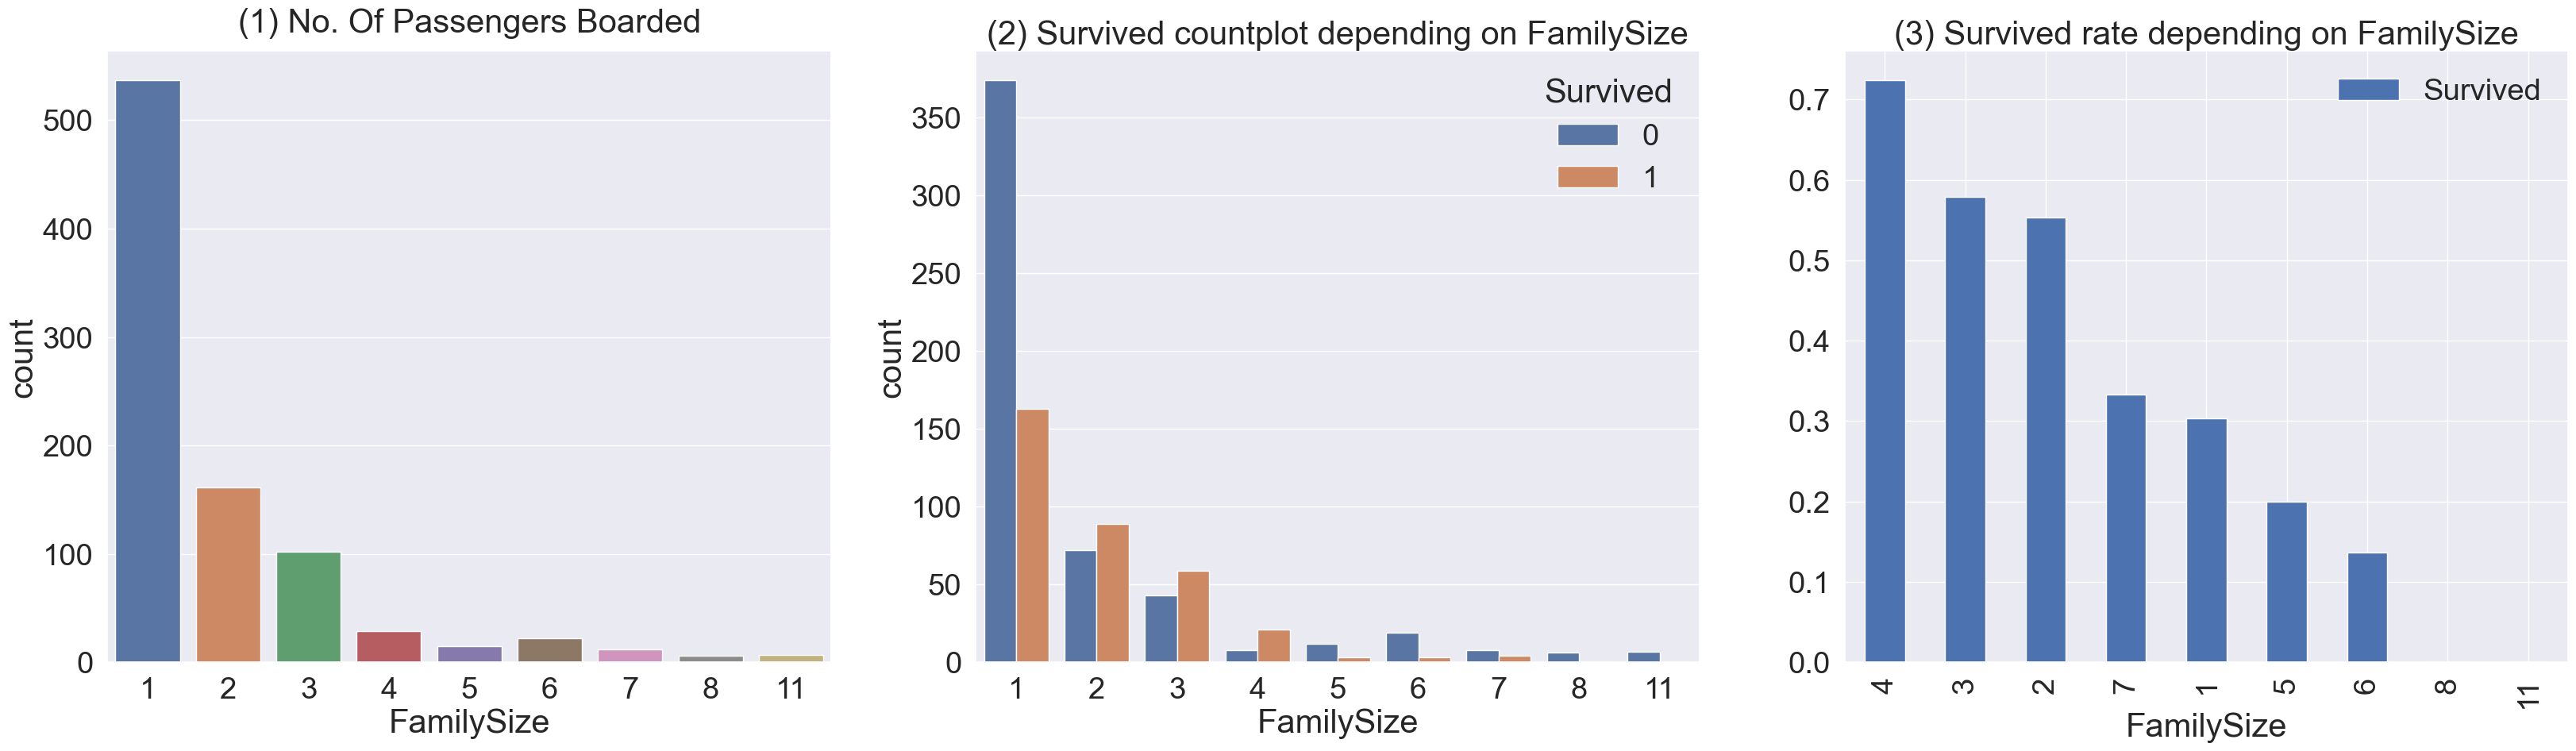

In [46]:
f, ax = plt.subplots(1, 3, figsize=(40,10))

sns.countplot(data=df_train, x='FamilySize', ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(data=df_train, x='FamilySize', hue='Survived', ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize')

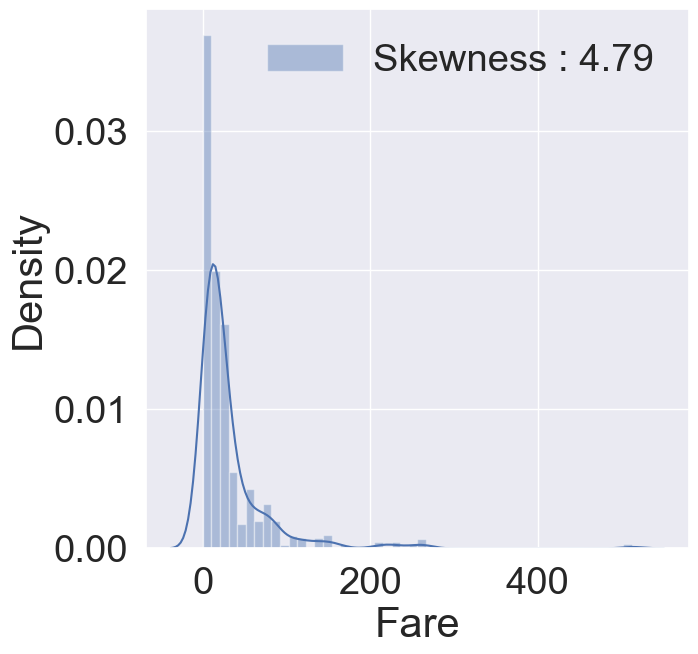

In [47]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [48]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

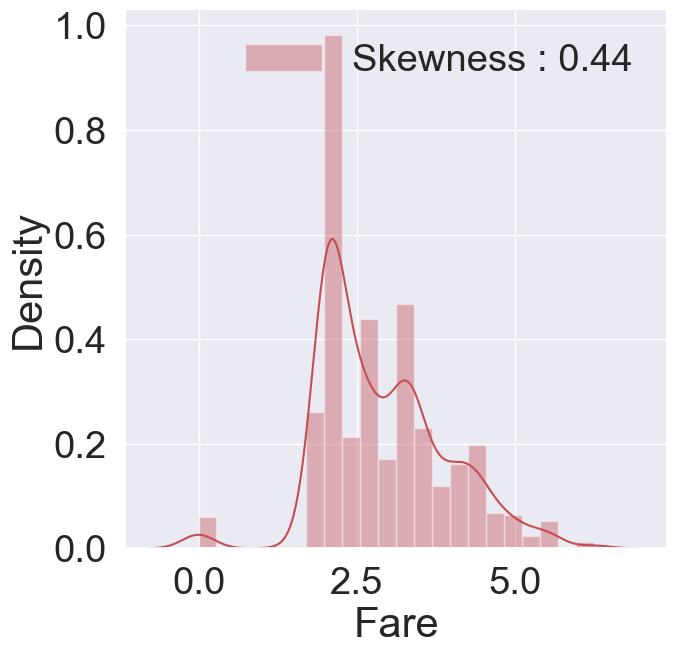

In [49]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

g = sns.distplot(df_train['Fare'], color='r', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')